In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_orig()
import numpy as np
import pandas as pd
import json

# Set the output directory here
outdir = 'outdir_aic_jankowski'

In [2]:
print('Classification published by Jankowski et al. (2018):')

Jankowski_2018_data = pd.read_csv('../catalogue/Jankowski_2018_data.csv')
Jankowski_2018_model_name_map = {
    'pl': 'simple power law',
    'broken pl': 'broken power law',
    'lps': 'log-parabolic spectrum',
    'low turn-over': 'low-frequency turn-over power law',
    'hard-ut-off': 'high-frequency cut-off power law',
    '-': '(Unclassified)'
}
x1 = Jankowski_2018_data['class'].value_counts().index.to_numpy()
x1 = np.array([Jankowski_2018_model_name_map[i] for i in x1])
y1 = Jankowski_2018_data['class'].value_counts().to_numpy()
pd.DataFrame({
    'Model': x1,
    'Count': [f'{v} / {y1.sum()} = {v/y1.sum()*100:.1f}%' for i, v in enumerate(y1)]
})

Classification published by Jankowski et al. (2018):


,Model,Count
0,simple power law,276 / 441 = 62.6%
1,(Unclassified),92 / 441 = 20.9%
2,log-parabolic spectrum,35 / 441 = 7.9%
3,broken power law,25 / 441 = 5.7%
4,low-frequency turn-over power law,10 / 441 = 2.3%
5,high-frequency cut-off power law,3 / 441 = 0.7%


In [3]:
print('Classification in the reproduced results, following Jankowski et al. (2018)\'s AIC method:')

with open(f'../output/results_aic_from_{outdir}.json', 'r', encoding='utf-8-sig') as f:
    results_aic_json = json.load(f)
    
results_aic = pd.DataFrame(results_aic_json).T
results_aic['best_fitting'] = results_aic.iloc[:, :].idxmin(axis=1)

model_name_map = {
    'simple_power_law': 'simple power law',
    'broken_power_law': 'broken power law',
    'log_parabolic_spectrum': 'log-parabolic spectrum',
    'low_frequency_turn_over_power_law': 'low-frequency turn-over power law',
    'high_frequency_cut_off_power_law': 'high-frequency cut-off power law',
}
x2 = results_aic['best_fitting'].value_counts().index.to_numpy()
x2 = np.array([model_name_map[i] for i in x2])
y2 = results_aic['best_fitting'].value_counts().to_numpy()
x2 = np.append(x2, '(Unclassified)')
y2 = np.append(y2, 441 - y2.sum())
pd.DataFrame({
    'Model': x2,
    'Count': [f'{v} / {441} = {v/441*100:.1f}%' for i, v in enumerate(y2)]
})

Classification in the reproduced results, following Jankowski et al. (2018)'s AIC method:


,Model,Count
0,simple power law,214 / 441 = 48.5%
1,log-parabolic spectrum,53 / 441 = 12.0%
2,broken power law,32 / 441 = 7.3%
3,high-frequency cut-off power law,8 / 441 = 1.8%
4,low-frequency turn-over power law,6 / 441 = 1.4%
5,(Unclassified),128 / 441 = 29.0%


Comparison:


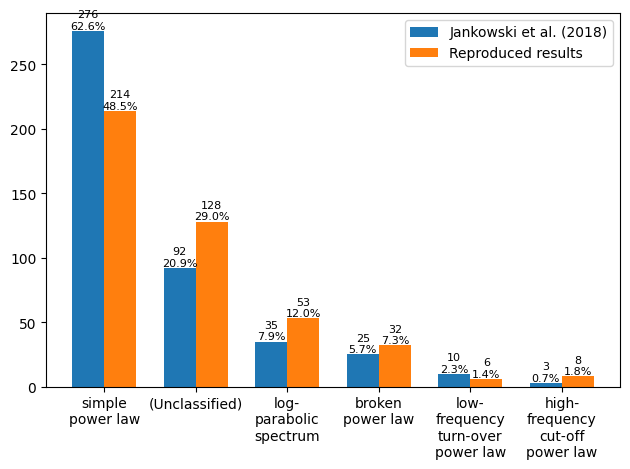

In [4]:
print('Comparison:')

fig, ax = plt.subplots()

# sort by x1
x2, y2 = zip(*sorted(zip(x2, y2), key=lambda x: x1.tolist().index(x[0])))

bar_width = 0.35
bar1 = ax.bar(np.arange(len(x1)), y1, bar_width, label='Jankowski et al. (2018)')
bar2 = ax.bar(np.arange(len(x2)) + bar_width, y2, bar_width, label='Reproduced results')
bar1_labels = [f'{v}\n{v/y1.sum()*100:.1f}%' for i, v in enumerate(y1)]
bar2_labels = [f'{v}\n{v/441*100:.1f}%' for i, v in enumerate(y2)]
for i, (bar1_label, bar2_label) in enumerate(zip(bar1_labels, bar2_labels)):
    ax.text(i, y1[i], bar1_label, ha='center', va='bottom', fontsize=8)
    ax.text(i + bar_width, y2[i], bar2_label, ha='center', va='bottom', fontsize=8)

ax.set_xticks(np.arange(len(x2)) + bar_width / 2)
ax.set_xticklabels([x.replace(' ', '\n').replace('-p','-\np').replace('-f','-\nf').replace('r\nl', 'r l') for x in x2])
ax.legend()
plt.tight_layout()
plt.show()